In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Generalization

## Objectives

One of the key issues in designing a multilayer network is determining the number of neurons to use. The objective of this chapter is to explore this issue. 

In Chapter 11, we showed that if the number of neurons is too large, the network will **overfit** the training data. Overfitting means that the error on the training data is very small, but the network fails to perform well when presented with new data. A network that generalizes well performs similarly on new data as it does on the training data.

The complexity of a neural network is determined by the number of free parameters it has (i.e., weights and biases), which is in turn determined by the number of neurons. 

### Overfitting:
When a network is too complex for a given dataset, it is likely to **overfit** and have poor generalization.

We can represent overfitting using the error on the training data ($E_{train}$) and the error on new (test) data ($E_{test}$):

$$
\text{If} \ E_{train} \ll E_{test}, \text{the network is overfitting.}
$$

### Adjusting Complexity:
In this chapter, we will see that we can adjust the complexity of a network to fit the complexity of the data. Interestingly, this can be done **without changing the number of neurons**. Instead, we can adjust the **effective** number of free parameters without changing the actual number of free parameters.

Thus, we aim to balance the following:

- A large number of neurons leads to overfitting, but
- An appropriate adjustment of complexity can prevent overfitting and improve generalization.



## Theory and Examples

Mark Twain once said:

> "We should be careful to get out of an experience only the wisdom that is in it—and stop there; lest we be like the cat that sits down on a hot stove-lid. She will never sit down on a hot stove-lid again—and that is well; but also she will never sit down on a cold one anymore."  
> $\textit{(Following the Equator, 1897)}$

That is the objective of this chapter. We want to train neural networks to generalize, or **get out of the data only the wisdom that is in it**. This concept is called **generalization**. A network trained to generalize will perform as well on new data as it does on the data on which it was trained.

### Generalization

The key strategy for obtaining good generalization is to find the **simplest model** that explains the data. This is closely related to **Ockham’s Razor**, a principle named after the English logician William of Ockham from the 14th century. The idea is that the more complexity you introduce into your model, the greater the possibility for errors.

In neural networks, the simplest model is the one that contains the fewest number of free parameters (weights and biases), or equivalently, the smallest number of neurons. To generalize well, we need to find the simplest network that fits the data.

### Approaches to Simplifying Networks:

There are at least five different approaches used to produce simple networks:
1. **Growing**: Start with no neurons and add them until performance is adequate.
2. **Pruning**: Start with a large network and remove neurons until performance degrades.
3. **Global Searches**: Use methods like genetic algorithms to find the simplest architecture.
4. **Regularization**: Constrain the magnitude of network weights.
5. **Early Stopping**: Prevent the network from fully using all its weights by stopping training early.

In this chapter, we will concentrate on **regularization** and **early stopping** as two key methods for preventing overfitting and achieving generalization.

### Problem Statement

Let's begin by defining the problem of generalization. We start with a training set of example network inputs and corresponding target outputs. In the following figure, we see an example of overfitting:

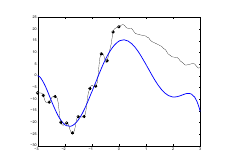
Figure.1 Example of Overfitting and Poor Extrapolation
In contrast, the following figure shows a network that generalizes well:

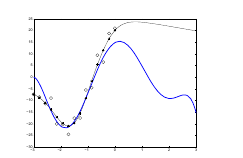

Figure.2 Example of Good Interpolation and Poor Extrapolation

## Generalization and Performance Index

We are given a set of training data:

$$
\{(p_1, t_1), (p_2, t_2), \dots, (p_Q, t_Q)\} \tag{13.1}
$$

For our discussion on generalization, we assume that the target outputs are generated by the following model:

$$
t_q = g(p_q) + \epsilon_q \tag{13.2}
$$

where $ g(.) $ is some unknown function and $ \epsilon_q $ represents a random, independent, zero-mean noise source.

### Training Objective

Our goal is to create a neural network that approximates $ g(.) $, while ignoring the noise. The standard performance index used in neural network training is the **sum of squared errors** on the training set:

$$
F(x) = E_D = \sum_{q=1}^{Q} (t_q - a_q)^2 \tag{13.3}
$$

where $ a_q $ is the network output for the input $ p_q $, and $ E_D $ represents the sum of squared errors on the training data.

In later sections, we will modify this performance index to include an additional term to improve generalization.


### Extrapolation Issues

In both figures, we see that the network fails to extrapolate accurately because it was trained only on data within a specific range, say $ -3 \leq p \leq 0 $. Outside of this range, the network response is unpredictable. This highlights the importance of having training data for all regions of the input space where the network will be used.

When the network has multiple inputs, it becomes more difficult to determine when it is interpolating versus extrapolating. This problem is illustrated below:


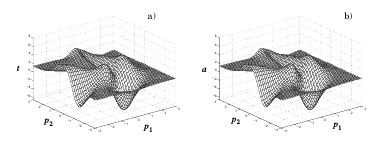

Figure.3 Function (a) and Neural Network Approximation (b)

We will discuss practical ways to handle this issue in future chapters.









Epoch 0: Total Error = 1032.8068790600903
Epoch 100: Total Error = 668.160029004865
Epoch 200: Total Error = 668.160029004865
Epoch 300: Total Error = 668.160029004865
Epoch 400: Total Error = 668.160029004865
Epoch 500: Total Error = 668.160029004865
Epoch 600: Total Error = 668.160029004865
Epoch 700: Total Error = 668.160029004865
Epoch 800: Total Error = 668.160029004865
Epoch 900: Total Error = 668.160029004865


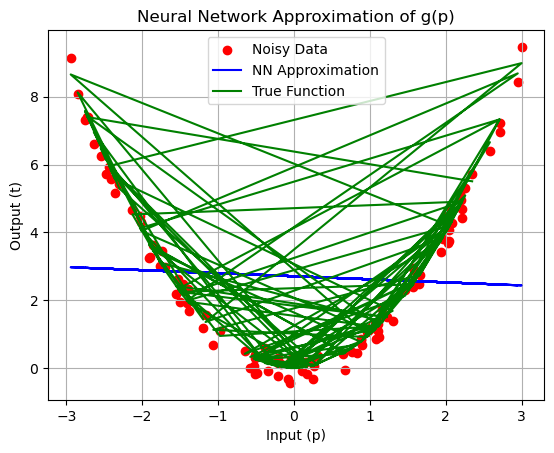

In [1]:
import random
import matplotlib.pyplot as plt

# Define the true function g(p)
def g(p):
    return p**2  # Example function: f(p) = p^2

# Generate synthetic data
def generate_data(Q):
    data = []
    for _ in range(Q):
        p = random.uniform(-3, 3)  # Random input
        noise = random.uniform(-0.5, 0.5)  # Add noise
        t = g(p) + noise  # Target output with noise
        data.append((p, t))
    return data

# Define a simple feedforward neural network
class SimpleNeuralNetwork:
    def __init__(self):
        self.weight = random.uniform(-1, 1)  # Initialize weight
        self.bias = random.uniform(-1, 1)    # Initialize bias

    def forward(self, p):
        return self.weight * p + self.bias  # Linear output

    def train(self, data, learning_rate=0.01, epochs=1000):
        for _ in range(epochs):
            total_error = 0
            for p, t in data:
                a = self.forward(p)  # Network output
                error = t - a  # Error
                total_error += error ** 2  # Sum squared error

                # Update weights and biases
                self.weight += learning_rate * error * p
                self.bias += learning_rate * error

            if _ % 100 == 0:  # Print the error every 100 epochs
                print(f'Epoch {_}: Total Error = {total_error}')

# Main function to run the program
def main():
    Q = 100  # Number of training examples
    data = generate_data(Q)

    # Train the neural network
    nn = SimpleNeuralNetwork()
    nn.train(data)

    # Evaluate performance
    p_values = [p for p, _ in data]
    t_values = [t for _, t in data]
    a_values = [nn.forward(p) for p in p_values]

    # Plotting the results
    plt.scatter(p_values, t_values, label='Noisy Data', color='red')
    plt.plot(p_values, a_values, label='NN Approximation', color='blue')
    plt.plot(p_values, [g(p) for p in p_values], label='True Function', color='green')
    plt.xlabel('Input (p)')
    plt.ylabel('Output (t)')
    plt.legend()
    plt.title('Neural Network Approximation of g(p)')
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()


## Estimating Generalization Error - The Test Set

Before discussing methods for improving the generalization capability of neural networks, we should first discuss how we can estimate this error for a specific neural network. Given a limited amount of available data, it is important to hold aside a certain subset during the training process. After the network has been trained, we will compute the errors that the trained network makes on this test set. The test set errors will then give us an indication of how the network will perform in the future; they are a measure of the generalization capability of the network.

### Important Considerations for the Test Set

For the test set to be a valid indicator of generalization capability, there are two important considerations to keep in mind:

1. **Isolation of the Test Set**: The test set must never be used in any way to train the neural network, or even to select one network from a group of candidate networks. The test set should only be used after all training and selection is complete.

2. **Representativeness of the Test Set**: The test set must be representative of all situations for which the network will be used. This can sometimes be difficult to guarantee, especially when the input space is high-dimensional or has a complex shape. This issue will be discussed in more detail in Chapter 22, Practical Training Issues.

In the remaining sections of this chapter, we will assume that a test set has been removed from the dataset before training begins, and that this set will be used upon completion of training to measure generalization capability.

## Early Stopping

The first method for improving generalization that we will discuss is called **early stopping** [WaVe94]. The idea behind this method is that as training progresses, the network uses more and more of its weights, until all weights are fully used when training reaches a minimum of the error surface. 

By increasing the number of training iterations, we are increasing the complexity of the resulting network. If training is stopped before the minimum is reached, then the network will effectively be using fewer parameters and will be less likely to overfit.

### Determining When to Stop Training

To use early stopping effectively, we need to know when to stop the training. We will describe a method called **cross-validation**, which is a strategy used to decide when to stop training.


Cross-validation involves splitting the available data into two parts: a training set and a validation set.

### Early Stopping and Validation Set

To effectively use early stopping, we utilize a validation set to decide when to stop training [Sarl95]. The available data, after removing the test set as described earlier, is divided into two parts: a training set and a validation set.

- **Training Set**: This is used to compute gradients or Jacobians and to determine the weight updates at each iteration.
- **Validation Set**: This set acts as an indicator of the network's performance "in between" the training points. The error on the validation set is monitored during the training process.

When the error on the validation set increases for several iterations, training is stopped. The weights that produced the minimum error on the validation set are used as the final trained network weights.

### Illustration of Early Stopping

This process is illustrated in Figure.4. The graph at the bottom shows the progress of the training and validation performance indices, $ F $ (the sum squared errors), during training. 

Although the training error continues to decrease throughout the training process, a minimum of the validation error occurs at the point labeled $ a $, corresponding to training iteration 14. 

- The graph at the upper left shows the network response at this early stopping point. The resulting network provides a good fit to the true function.
- The graph at the upper right demonstrates the network response if training continues to point $ b $, where the validation error has increased and the network is overfitting.

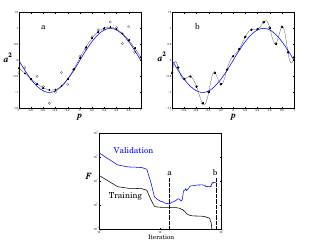

Figure.4 Illustration of Early Stopping

### Practical Considerations for Early Stopping

The basic concept for early stopping is simple, but there are several practical issues to address.

1. **Representative Validation Set**: 
   - The validation set must be chosen to ensure it is representative of all situations for which the network will be used. This requirement applies to the training and test sets as well. 
   - Each set must roughly cover the input space equivalently, although the size of each set may differ.

2. **Data Division**:
   - Typically, the data is divided into approximately:
     - 70% for training
     - 15% for validation
     - 15% for testing
   - These percentages are approximate. A more comprehensive discussion on selecting the amount of data for the validation set can be found in \cite{AmMu97}.

3. **Training Method Speed**:
   - It is advisable to use a relatively slow training method. During training, the network will increasingly utilize the available parameters (as explained in the last section of this chapter).
   - If the training method is too fast, it may jump past the point at which the validation error is minimized.




In [3]:
# Implementation of a simple neural network with early stopping

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights for input to hidden layer and hidden to output layer
        self.weights_input_hidden = [[0.01 for _ in range(hidden_size)] for _ in range(input_size)]
        self.weights_hidden_output = [[0.01 for _ in range(output_size)] for _ in range(hidden_size)]
        self.hidden_size = hidden_size
        self.output_size = output_size

    def forward(self, x):
        # Forward pass through the network
        self.hidden = [0.0 for _ in range(self.hidden_size)]
        for i in range(self.hidden_size):
            self.hidden[i] = sum(x[j] * self.weights_input_hidden[j][i] for j in range(len(x)))

        self.output = [0.0 for _ in range(self.output_size)]
        for i in range(self.output_size):
            self.output[i] = sum(self.hidden[j] * self.weights_hidden_output[j][i] for j in range(self.hidden_size))

        return self.output

    def compute_loss(self, target):
        # Compute the loss using mean squared error
        return sum((target[i] - self.output[i]) ** 2 for i in range(self.output_size)) / self.output_size

    def update_weights(self, x, target, learning_rate):
        # Update weights using a simple gradient descent method (not detailed here)
        # This should adjust weights based on the difference between target and output
        pass  # Placeholder for weight update logic

def early_stopping(train_data, val_data, network, learning_rate, patience):
    best_val_loss = float('inf')
    patience_counter = 0
    epoch = 0

    while patience_counter < patience:
        # Training phase
        for x, target in train_data:
            network.forward(x)
            loss = network.compute_loss(target)
            network.update_weights(x, target, learning_rate)

        # Validation phase
        val_loss = 0.0
        for x, target in val_data:
            network.forward(x)
            val_loss += network.compute_loss(target)

        val_loss /= len(val_data)

        print(f"Epoch {epoch}, Validation Loss: {val_loss:.4f}")

        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0  # Reset the counter if validation loss improved
            # Save model weights here if necessary
        else:
            patience_counter += 1  # Increase counter if no improvement

        epoch += 1

# Example usage:
# Define data (inputs and targets)
train_data = [([0.1, 0.2], [0.3]), ([0.4, 0.5], [0.6])]
val_data = [([0.2, 0.3], [0.5]), ([0.6, 0.7], [0.8])]

# Create neural network
network = SimpleNeuralNetwork(input_size=2, hidden_size=3, output_size=1)

# Run early stopping training
early_stopping(train_data, val_data, network, learning_rate=0.01, patience=3)


Epoch 0, Validation Loss: 0.4446
Epoch 1, Validation Loss: 0.4446
Epoch 2, Validation Loss: 0.4446
Epoch 3, Validation Loss: 0.4446


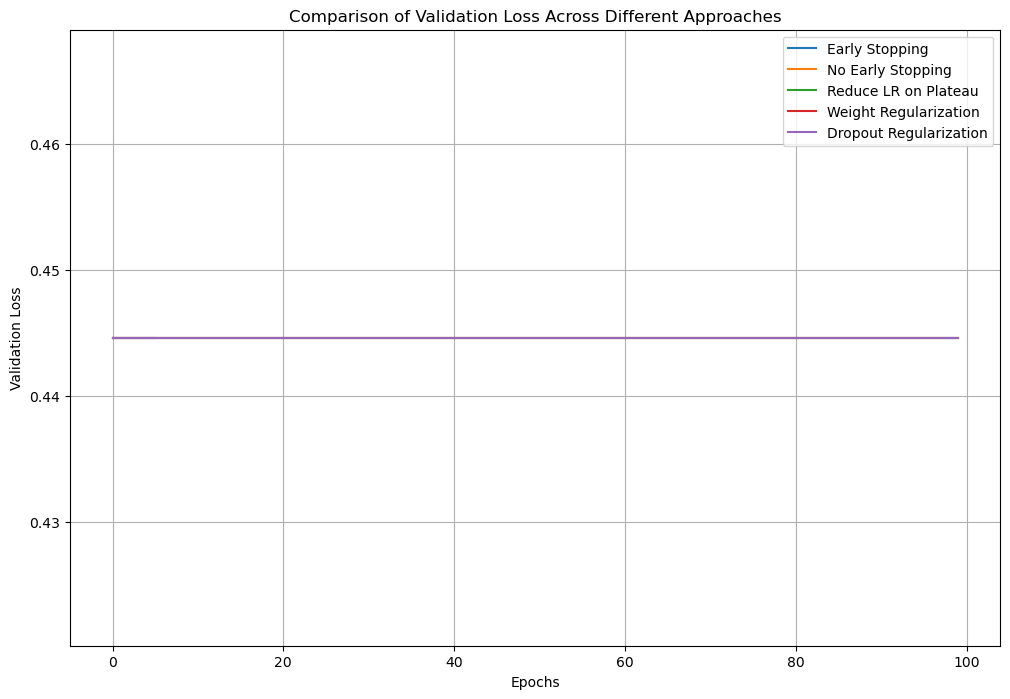

In [5]:
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = [[0.01 for _ in range(hidden_size)] for _ in range(input_size)]
        self.weights_hidden_output = [[0.01 for _ in range(output_size)] for _ in range(hidden_size)]
        self.hidden_size = hidden_size
        self.output_size = output_size

    def forward(self, x):
        self.hidden = [0.0 for _ in range(self.hidden_size)]
        for i in range(self.hidden_size):
            self.hidden[i] = sum(x[j] * self.weights_input_hidden[j][i] for j in range(len(x)))

        self.output = [0.0 for _ in range(self.output_size)]
        for i in range(self.output_size):
            self.output[i] = sum(self.hidden[j] * self.weights_hidden_output[j][i] for j in range(self.hidden_size))

        return self.output

    def compute_loss(self, target):
        return sum((target[i] - self.output[i]) ** 2 for i in range(self.output_size)) / self.output_size

    def update_weights(self, x, target, learning_rate):
        # Placeholder for weight update logic using gradient descent
        pass  # Implement weight update logic here


def early_stopping(train_data, val_data, network, learning_rate, patience):
    best_val_loss = float('inf')
    patience_counter = 0
    epoch = 0
    val_losses = []

    while patience_counter < patience:
        # Training phase
        for x, target in train_data:
            network.forward(x)
            loss = network.compute_loss(target)
            network.update_weights(x, target, learning_rate)

        # Validation phase
        val_loss = 0.0
        for x, target in val_data:
            network.forward(x)
            val_loss += network.compute_loss(target)

        val_loss /= len(val_data)
        val_losses.append(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        epoch += 1

    return val_losses


def no_early_stopping(train_data, val_data, network, learning_rate):
    val_losses = []
    for epoch in range(100):  # Arbitrary large number of epochs
        # Training phase
        for x, target in train_data:
            network.forward(x)
            loss = network.compute_loss(target)
            network.update_weights(x, target, learning_rate)

        # Validation phase
        val_loss = 0.0
        for x, target in val_data:
            network.forward(x)
            val_loss += network.compute_loss(target)

        val_loss /= len(val_data)
        val_losses.append(val_loss)

    return val_losses


def reduce_lr_on_plateau(train_data, val_data, network, learning_rate):
    val_losses = []
    for epoch in range(100):  # Arbitrary large number of epochs
        # Training phase
        for x, target in train_data:
            network.forward(x)
            loss = network.compute_loss(target)
            network.update_weights(x, target, learning_rate)

        # Validation phase
        val_loss = 0.0
        for x, target in val_data:
            network.forward(x)
            val_loss += network.compute_loss(target)

        val_loss /= len(val_data)
        val_losses.append(val_loss)

        # Reduce learning rate if validation loss doesn't improve
        if epoch > 0 and val_losses[-1] > val_losses[-2]:
            learning_rate *= 0.5  # Reduce learning rate by half

    return val_losses


def weight_regularization(train_data, val_data, network, learning_rate, l2_lambda):
    val_losses = []
    for epoch in range(100):  # Arbitrary large number of epochs
        # Training phase
        for x, target in train_data:
            network.forward(x)
            loss = network.compute_loss(target)

            # Apply L2 Regularization
            l2_penalty = l2_lambda * (
                sum(weight ** 2 for layer in network.weights_input_hidden for weight in layer) +
                sum(weight ** 2 for layer in network.weights_hidden_output for weight in layer)
            )
            total_loss = loss + l2_penalty
            network.update_weights(x, target, learning_rate)  # Adjust this line to update weights based on total_loss if necessary

        # Validation phase
        val_loss = 0.0
        for x, target in val_data:
            network.forward(x)
            val_loss += network.compute_loss(target)

        val_loss /= len(val_data)
        val_losses.append(val_loss)

    return val_losses



def dropout_regularization(train_data, val_data, network, learning_rate):
    val_losses = []
    for epoch in range(100):
        # Training phase with dropout (not implemented fully)
        for x, target in train_data:
            # Apply dropout (e.g., randomly zero out some hidden units)
            network.forward(x)
            loss = network.compute_loss(target)
            network.update_weights(x, target, learning_rate)

        # Validation phase
        val_loss = 0.0
        for x, target in val_data:
            network.forward(x)
            val_loss += network.compute_loss(target)

        val_loss /= len(val_data)
        val_losses.append(val_loss)

    return val_losses


# Example usage:
train_data = [([0.1, 0.2], [0.3]), ([0.4, 0.5], [0.6])]
val_data = [([0.2, 0.3], [0.5]), ([0.6, 0.7], [0.8])]

# Initialize the networks
networks = {
    "Early Stopping": SimpleNeuralNetwork(input_size=2, hidden_size=3, output_size=1),
    "No Early Stopping": SimpleNeuralNetwork(input_size=2, hidden_size=3, output_size=1),
    "Reduce LR on Plateau": SimpleNeuralNetwork(input_size=2, hidden_size=3, output_size=1),
    "Weight Regularization": SimpleNeuralNetwork(input_size=2, hidden_size=3, output_size=1),
    "Dropout Regularization": SimpleNeuralNetwork(input_size=2, hidden_size=3, output_size=1)
}

# Run all approaches and store results
results = {
    "Early Stopping": early_stopping(train_data, val_data, networks["Early Stopping"], learning_rate=0.01, patience=5),
    "No Early Stopping": no_early_stopping(train_data, val_data, networks["No Early Stopping"], learning_rate=0.01),
    "Reduce LR on Plateau": reduce_lr_on_plateau(train_data, val_data, networks["Reduce LR on Plateau"], learning_rate=0.01),
    "Weight Regularization": weight_regularization(train_data, val_data, networks["Weight Regularization"], learning_rate=0.01, l2_lambda=0.01),
    "Dropout Regularization": dropout_regularization(train_data, val_data, networks["Dropout Regularization"], learning_rate=0.01)
}

# Plotting the results
plt.figure(figsize=(12, 8))
for label, val_losses in results.items():
    plt.plot(val_losses, label=label)

plt.title('Comparison of Validation Loss Across Different Approaches')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()


## Regularization

The second method we will discuss for improving generalization is called regularization. For this method, we modify the sum squared error performance index of Eq. (13.3) to include a term that penalizes network complexity. This concept was introduced by Tikhonov \cite{Tikh63}. He added a penalty, or regularization, term that involved the derivatives of the approximating function (neural network in our case), which forced the resulting function to be smooth. Under certain conditions, this regularization term can be written as the sum of squares of the network weights, as in

$$
Q_n T_2 F(x) = \beta E_D + \alpha E_W = \beta \sum_{q=1}^{Q} (t_q - a_q)^2 + \alpha \sum_{i=1}^{N} w_i^2, \tag{13.4}
$$

where the ratio $\frac{\alpha}{\beta}$ controls the effective complexity of the network solution. The larger this ratio is, the smoother the network response. (Note that we could have used a single parameter here, but developments in later sections will require two parameters.)

Why do we want to penalize the sum squared weights, and how is this similar to reducing the number of neurons? Consider again the example multilayer network shown in Figure.4. Recall how increasing a weight increased the slope of the network function. You can see this effect again in Figure 13.5, where we have changed the weight $ w_{1,1} $ from 0 to 2. When the weights are large, the function created by the network can have large slopes, and is therefore more likely to overfit the training data. If we restrict the weights to be small, then the network function will create a smooth interpolation through the training data—just as if the network had a small number of neurons.

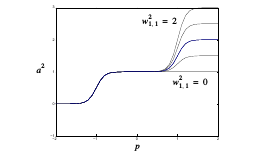

Figure.5 Effect of Weight on Network Response

To experiment with the effect of weight changes on the network function, use the MATLAB® Neural Network Design Demonstration Network Function (nnd11nf). The key to the success of the regularization method in producing a network that generalizes well is the correct choice of the regularization ratio $\frac{\alpha}{\beta}$. 


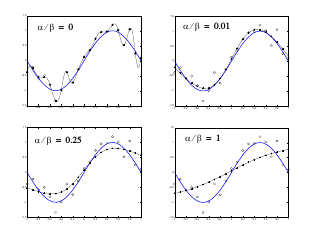

Figure.6 Effect of Regularization Ratio


Figure .6 illustrates the effect of changing this ratio. Here we have trained a 1-20-1 network on 21 noisy samples of a sine wave. In the figure, the blue line represents the true function, and the large open circles represent the noisy data. The black curve represents the trained network response, and the smaller circles filled with crosses represent the network response at the training points. 

From the figure, we can see that the ratio $\frac{\alpha}{\beta} = 0.01$ produces the best fit to the true function. For ratios larger than this, the network response is too smooth, and for ratios smaller than this, the network overfits.

There are several techniques for setting the regularization parameter. One approach is to use a validation set, such as we described in the section on early stopping; the regularization parameter is set to minimize the squared error on the validation set $\cite{GoLa98}$. In the next two sections, we will describe a different technique for automatically setting the regularization parameter. It is called Bayesian regularization.





In [8]:
import random
from math import exp  # Import exp function from math module

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]
        self.weights_hidden_output = [random.uniform(-1, 1) for _ in range(hidden_size)]
        
    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def forward(self, x):
        # Forward pass
        self.hidden_layer = [self.sigmoid(sum(x[i] * self.weights_input_hidden[i][j] for i in range(len(x)))) for j in range(len(self.weights_input_hidden[0]))]
        self.output = sum(self.hidden_layer[j] * self.weights_hidden_output[j] for j in range(len(self.hidden_layer)))
        return self.output
    
    def compute_loss(self, target, output):
        return (target - output) ** 2

    def l2_regularization(self, l2_lambda):
        # Calculate L2 penalty
        l2_penalty = sum(weight ** 2 for layer in self.weights_input_hidden for weight in layer) + sum(weight ** 2 for weight in self.weights_hidden_output)
        return l2_lambda * l2_penalty

    def update_weights(self, x, target, learning_rate, l2_lambda):
        output = self.forward(x)
        loss = self.compute_loss(target, output)

        # Compute gradients and update weights (basic approach)
        for i in range(len(self.weights_input_hidden)):
            for j in range(len(self.weights_input_hidden[i])):
                gradient = (output - target) * self.hidden_layer[j] * x[i]
                self.weights_input_hidden[i][j] -= learning_rate * gradient

        for j in range(len(self.weights_hidden_output)):
            gradient = (output - target) * self.hidden_layer[j]
            self.weights_hidden_output[j] -= learning_rate * gradient
        
        # Apply L2 Regularization
        l2_penalty = self.l2_regularization(l2_lambda)
        for i in range(len(self.weights_input_hidden)):
            for j in range(len(self.weights_input_hidden[i])):
                self.weights_input_hidden[i][j] -= learning_rate * l2_penalty

        for j in range(len(self.weights_hidden_output)):
            self.weights_hidden_output[j] -= learning_rate * l2_penalty

    def train(self, training_data, targets, validation_data, validation_targets, learning_rate, l2_lambda, patience):
        best_validation_loss = float('inf')
        epochs_without_improvement = 0
        
        for epoch in range(100):  # Maximum epochs
            for x, target in zip(training_data, targets):
                self.update_weights(x, target, learning_rate, l2_lambda)
                
            # Validate
            validation_loss = sum(self.compute_loss(target, self.forward(x)) for x, target in zip(validation_data, validation_targets)) / len(validation_data)
            print(f'Epoch {epoch}, Validation Loss: {validation_loss}')

            if validation_loss < best_validation_loss:
                best_validation_loss = validation_loss
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            if epochs_without_improvement >= patience:
                print(f'Early stopping at epoch {epoch}')
                break

# Example usage
if __name__ == "__main__":
    input_size = 2
    hidden_size = 2
    output_size = 1

    # Sample data (XOR problem)
    training_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
    targets = [0, 1, 1, 0]

    validation_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
    validation_targets = [0, 1, 1, 0]

    learning_rate = 0.1
    l2_lambda = 0.01
    patience = 10

    nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
    nn.train(training_data, targets, validation_data, validation_targets, learning_rate, l2_lambda, patience)


Epoch 0, Validation Loss: 0.9484812612822286
Epoch 1, Validation Loss: 0.7066419141578522
Epoch 2, Validation Loss: 0.5450364057463577
Epoch 3, Validation Loss: 0.443373075952512
Epoch 4, Validation Loss: 0.38191421050631236
Epoch 5, Validation Loss: 0.3454809656252266
Epoch 6, Validation Loss: 0.32391853113200386
Epoch 7, Validation Loss: 0.31098610098010715
Epoch 8, Validation Loss: 0.3030317440697321
Epoch 9, Validation Loss: 0.297968905326385
Epoch 10, Validation Loss: 0.29461235540848396
Epoch 11, Validation Loss: 0.29228406981097127
Epoch 12, Validation Loss: 0.29058996848684593
Epoch 13, Validation Loss: 0.2892960908063986
Epoch 14, Validation Loss: 0.288260211711474
Epoch 15, Validation Loss: 0.28739379206306886
Epoch 16, Validation Loss: 0.2866404732727069
Epoch 17, Validation Loss: 0.28596366516005456
Epoch 18, Validation Loss: 0.2853392094155247
Epoch 19, Validation Loss: 0.2847509351416534
Epoch 20, Validation Loss: 0.2841879016983174
Epoch 21, Validation Loss: 0.2836426506

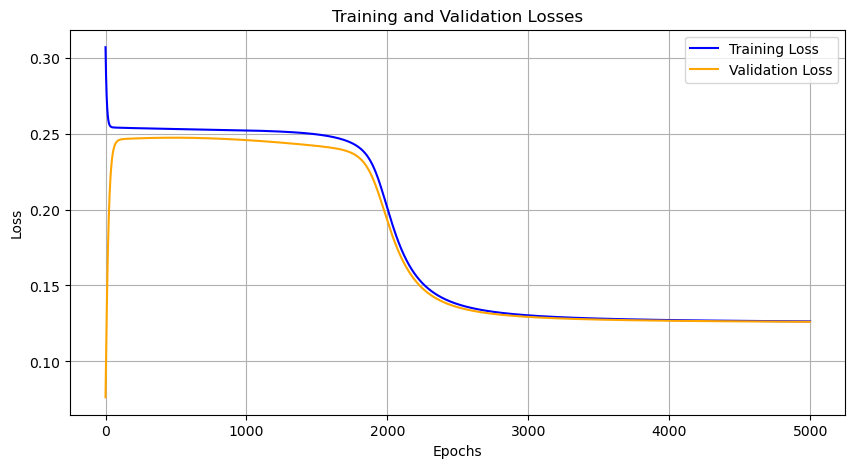

In [9]:
import random
from math import exp
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with small random values
        self.weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]
        self.weights_hidden_output = [random.uniform(-1, 1) for _ in range(hidden_size)]
    
    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def forward(self, x):
        # Forward pass through the network
        hidden_layer_input = [sum(x[i] * self.weights_input_hidden[i][j] for i in range(len(x))) for j in range(len(self.weights_input_hidden[0]))]
        hidden_layer_output = [self.sigmoid(val) for val in hidden_layer_input]
        
        output_layer_input = sum(hidden_layer_output[j] * self.weights_hidden_output[j] for j in range(len(hidden_layer_output)))
        output = self.sigmoid(output_layer_input)
        
        return output, hidden_layer_output

    def calculate_loss(self, target, output):
        # Calculate the mean squared error loss
        return (target - output) ** 2

    def update_weights(self, x, target, learning_rate):
        # Update weights based on the backpropagation algorithm
        output, hidden_layer_output = self.forward(x)
        loss = self.calculate_loss(target, output)
        
        # Calculate gradients (backpropagation)
        output_error = target - output
        hidden_errors = [output_error * self.weights_hidden_output[j] * hidden_layer_output[j] * (1 - hidden_layer_output[j]) for j in range(len(hidden_layer_output))]

        # Update weights for hidden to output
        for j in range(len(self.weights_hidden_output)):
            self.weights_hidden_output[j] += learning_rate * output_error * hidden_layer_output[j]

        # Update weights for input to hidden
        for i in range(len(self.weights_input_hidden)):
            for j in range(len(self.weights_input_hidden[i])):
                self.weights_input_hidden[i][j] += learning_rate * hidden_errors[j] * x[i]

        return loss

    def train(self, training_data, targets, learning_rate=0.1, epochs=1000, validation_data=None):
        train_losses = []
        val_losses = []
        
        for epoch in range(epochs):
            epoch_loss = 0
            for x, target in zip(training_data, targets):
                loss = self.update_weights(x, target, learning_rate)
                epoch_loss += loss
            
            train_losses.append(epoch_loss / len(training_data))
            
            # Validation phase
            if validation_data:
                val_loss = 0
                for x_val, target_val in validation_data:
                    output, _ = self.forward(x_val)
                    val_loss += self.calculate_loss(target_val, output)
                val_losses.append(val_loss / len(validation_data))
        
        return train_losses, val_losses

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='blue')
    if val_losses:
        plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Sample dataset (XOR problem)
    training_data = [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]
    targets = [0, 1, 1, 0]  # XOR target outputs

    # Split the data into training and validation sets
    validation_data = [
        ([0, 1], 1),
        ([1, 0], 1)
    ]

    # Create and train the neural network
    nn = SimpleNeuralNetwork(input_size=2, hidden_size=2, output_size=1)
    train_losses, val_losses = nn.train(training_data, targets, learning_rate=0.1, epochs=5000, validation_data=validation_data)

    # Plot the losses
    plot_losses(train_losses, val_losses)


## Bayesian Analysis

Thomas Bayes was a Presbyterian minister who lived in England during the 1700s. He was also an amateur mathematician. His most important work was published after his death. In it, he presented what is now known as Bayes' Theorem.

The theorem states that if you have two random events, $ A $ and $ B $, then the conditional probability of the occurrence of $ A $, given the occurrence of $ B $, can be computed as:

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)} \tag{13.5}
$$

Eq. (13.5) is called Bayes' rule. Each of the terms in this expression has a name by which it is commonly referred:

- $ P(A) $ is called the **prior probability**. It tells us what we know about $ A $ before we know the outcome of $ B $.
- $ P(A|B) $ is called the **posterior probability**. This tells us what we know about $ A $ after we learn about $ B $.
- $ P(B|A) $ is the **conditional probability** of $ B $ given $ A $. Normally, this term is given by our knowledge of the system that describes the relationship between $ B $ and $ A $.
- $ P(B) $ is the **marginal probability** of the event $ B $, and it acts as a normalization factor in Bayes' rule.

To illustrate how Bayes' rule can be used, consider the following medical situation. Assume that 1% of the population has a certain disease. There is a test that can be performed to detect the presence of this disease. The test is 80% accurate in detecting the disease in people who have it. However, 10% of the time, someone without the disease will register a positive test. If you take the test and register positive, your question would be: What is the probability that I actually have the disease?

Most of us (including most physicians, as has been shown in many studies), would guess that the probability is very high, considering that the test is 80% accurate in detecting the disease in a sick person. However, this turns out not to be the case, and Bayes' rule can help us overcome this lack of intuition when it comes to probability.

Let $ A $ represent the event that you have the disease. Let $ B $ represent the event that you have a positive test result. We can then use Bayes' rule to find $ P(A|B) $, which is the probability that you have the disease, given that you have a positive test. We know that the prior probability $ P(A) $ would be 0.01, because 1% of the population has the disease. $ P(B|A) $ is 0.8, because the test is 80% accurate in detecting the disease in those who have it. 

In order to use Bayes' rule, we need one more term, which is $ P(B) $. This is the probability of getting a positive test, whether or not you have the disease. This can be obtained by adding the probability of having a positive test when you have the disease to the probability of having a positive test when you don’t have the disease:

$$
P(B) = P(A \cap B) + P(\neg A \cap B) = P(B|A) P(A) + P(B|\neg A) P(\neg A) \tag{13.6}
$$

Where we have used the definition of conditional probability:

$$
P(A \cap B) = P(B|A) P(A) \tag{13.7}
$$

If we plug in our known probabilities into Eq. (13.6), we find:

$$
P(B) = 0.8 \times 0.01 + 0.1 \times 0.99 = 0.107 \tag{13.8}
$$

Where \( P(B|\neg A) \) is 0.1, because 10% of healthy people register a positive test. 

We can now use Bayes' rule to find the posterior probability \( P(A|B) \):

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)} = \frac{0.8 \times 0.01}{0.107} = 0.0748 \tag{13.9}
$$

This tells us that even if you get a positive test, you only have a 7.5% chance of having the disease. For most of us, this result is not intuitive. The key to Bayes' rule is the prior probability $ P(A) $. In this case, the prior odds of having the disease were only 1 in 100. If this number had been much higher, then our posterior probability $ P(A|B) $ would have also increased significantly. 

It is important when using Bayes' rule to have the prior probability $ P(A) $ accurately reflect our prior knowledge. For another example of using Bayes' rule and the effect of the prior density, see Solved Problem P13.2 and its associated demonstration.

In the next section, we will apply Bayesian analysis to the training of multilayer networks. The advantage of Bayesian methods is that we can insert prior knowledge through the selection of the prior probability. For neural network training, we will make the prior assumption that the function we are approximating is smooth. This means that the weights cannot be too large, as was demonstrated in Figure 13.5. The trick will be to incorporate this prior knowledge into an appropriate choice for the prior probability.


## Bayesian Regularization

Although there have been many approaches to the automatic selection of the regularization parameter, we will concentrate on one developed by David MacKay \cite{MacK92}. This approach puts the training of neural networks into a Bayesian statistical framework. This framework is useful for many aspects of training, in addition to the selection of the regularization parameter, so it is an important concept to become familiar with.

### Level I Bayesian Framework

The Bayesian framework begins with the assumption that the network weights are random variables. We then choose the weights that maximize the conditional probability of the weights given the data. Bayes' rule is used to find this probability function:

$$
P(x|D,\alpha,\beta,M) = \frac{P(D|x,\beta,M) P(x|\alpha,M)}{P(D|\alpha,\beta,M)} \tag{13.10}
$$

where $ x $ is the vector containing all of the weights and biases in the network, $ D $ represents the training data set, $ \alpha $ and $ \beta $ are parameters associated with the density functions $ P(D|x,\beta,M) $ and $ P(x|\alpha,M) $, and $ M $ is the selected model—the architecture of the network we have chosen (i.e., how many layers and how many neurons in each layer).

It is worth taking some time to investigate each of the terms in Eq. (13.10). First, $ P(D|x,\beta,M) $ is the probability density for the data, given a certain set of weights $ x $, the parameter $ \beta $ (which we will explain shortly), and the choice of model $ M $. If we assume that the noise terms are independent and have a Gaussian distribution, then:

$$
P(D|x,\beta,M) = \frac{1}{Z_D(\beta)} \exp(-\frac{1}{2} \beta E_D) \tag{13.11}
$$

where $ \beta = \frac{1}{2\sigma_\epsilon^2} $, $ \sigma_\epsilon $ is the variance of each element of $ \epsilon_q $, $ E_D $ is the squared error (as defined in a previous equation), and

$$
Z_D(\beta) = (2\pi\sigma_\epsilon^2)^{N/2} = \left(\pi \beta\right)^{-N/2} \tag{13.12}
$$

where $ N $ is the number of data points. 

The likelihood function in Eq. (13.11) is a function of the network weights $ x $ and describes how likely a given data set is to occur, given a specific set of weights. The maximum likelihood method selects the weights to maximize the likelihood function, which, in this Gaussian case, is the same as minimizing the squared error $ E_D $. Therefore, our standard sum squared error performance index can be derived statistically with the assumption of Gaussian noise in the training set, and our standard choice for the weights is the maximum likelihood estimate.

Now consider the second term on the right side of Eq. (13.10): $ P(x|\alpha,M) $. This is called the **prior density**. It embodies our knowledge about the network weights before we collect any data. Bayesian statistics allows us to incorporate prior knowledge through the prior density. For example, if we assume that the weights are small values centered around zero, we might select a zero-mean Gaussian prior density:

$$
P(x|\alpha,M) = \frac{1}{Z_W(\alpha)} \exp(-\frac{1}{2} \alpha E_W) \tag{13.13}
$$

where $ \alpha = \frac{1}{2\sigma_w^2} $, $ \sigma_w $ is the variance of each of the weights, $ E_W $ is the sum squared weights (as defined in a previous equation), and

$$
Z_W(\alpha) = (2\pi\sigma_w^2)^{n/2} = \left(\pi \alpha\right)^{-n/2} \tag{13.14}
$$

where $ n $ is the number of weights and biases in the network.

The final term on the right side of Eq. (13.10) is $ P(D|\alpha,\beta,M) $. This is called the **evidence**, and it is a normalizing term that is not a function of $ x $. If our objective is to find the weights $ x $ that maximize the posterior density $ P(x|D,\alpha,\beta,M) $, then we do not need to be concerned with $ P(D|\alpha,\beta,M) $. (However, it will be important later for estimating $ \alpha $ and $ \beta $.)

With the Gaussian assumptions we made earlier, we can rewrite the posterior density using Eq. (13.10) in the following form:

$$
P(x|D,\alpha,\beta,M) = \frac{1}{Z_W(\alpha) Z_D(\beta)} \exp\left(-\left(\beta E_D + \alpha E_W\right)\right) \tag{13.15}
$$

To find the most probable value for the weights, we should maximize the posterior density $ P(x|D,\alpha,\beta,M) $. This is equivalent to minimizing the regularized performance index:

$$
F(x) = \beta E_D + \alpha E_W \tag{13.16}
$$

Therefore, our regularized performance index can be derived using Bayesian statistics, with the assumption of Gaussian noise in the training set and a Gaussian prior density for the network weights. We will identify the weights that maximize the posterior density as $ x_{MP} $, or most probable. This is to be contrasted with the weights that maximize the likelihood function: $ x_{ML} $.

Note how this statistical framework provides a physical meaning for the parameters $ \alpha $ and $ \beta $. The parameter $ \beta $ is inversely proportional to the variance in the measurement noise $ \epsilon_q $. Therefore, if the noise variance is large, $ \beta $ will be small, and the regularization ratio $ \frac{\alpha}{\beta} $ will be large. This will force the resulting weights to be small and the network function to be smooth. The larger the measurement noise, the more we will smooth the network function to average out the effects of the noise.

The parameter $ \alpha $ is inversely proportional to the variance in the prior distribution for the network weights. If this variance is large, it means that we have very little certainty about the values of the network weights, and therefore, they might be very large. The parameter $ \alpha $ will then be small, and the regularization ratio $ \frac{\alpha}{\beta} $ will also be small. This will allow the network weights to be large, and the network function will be allowed to have more variation. The larger the variance in the prior density for the network weights, the more variation the network function will be allowed to have.


In [10]:
import numpy as np

class BayesianNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, alpha, beta):
        """
        Initializes the Bayesian Neural Network.

        Parameters:
        - input_size: Number of input features.
        - hidden_size: Number of neurons in the hidden layer.
        - output_size: Number of output neurons.
        - alpha: Hyperparameter for prior distribution (regularization strength).
        - beta: Hyperparameter for likelihood function (inverse noise variance).
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.alpha = alpha
        self.beta = beta

        # Initialize weights and biases
        self.weights_1 = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_1 = np.zeros((1, hidden_size))
        self.weights_2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_2 = np.zeros((1, output_size))

    def forward(self, X):
        """
        Forward pass through the network.

        Parameters:
        - X: Input data.

        Returns:
        - Output of the network.
        """
        self.z1 = np.dot(X, self.weights_1) + self.bias_1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights_2) + self.bias_2
        return self.sigmoid(self.z2)

    def sigmoid(self, z):
        """
        Sigmoid activation function.

        Parameters:
        - z: Input to the activation function.

        Returns:
        - Activated output.
        """
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_pred):
        """
        Compute the Bayesian regularized loss function.

        Parameters:
        - y_true: True labels.
        - y_pred: Predicted output.

        Returns:
        - Regularized loss value.
        """
        # Likelihood term
        E_D = np.mean((y_true - y_pred) ** 2)  # Mean Squared Error
        # Prior term
        E_W = np.sum(self.weights_1**2) + np.sum(self.weights_2**2)  # L2 regularization

        # Regularized performance index
        loss = 0.5 * self.beta * E_D + 0.5 * self.alpha * E_W
        return loss

    def backpropagation(self, X, y_true, y_pred, learning_rate):
        """
        Perform backpropagation to update the weights.

        Parameters:
        - X: Input data.
        - y_true: True labels.
        - y_pred: Predicted output.
        - learning_rate: Learning rate for weight updates.
        """
        # Calculate gradients
        output_error = y_pred - y_true
        d_z2 = output_error * y_pred * (1 - y_pred)  # Derivative of sigmoid

        # Gradients for weights and biases
        d_weights_2 = np.dot(self.a1.T, d_z2)
        d_bias_2 = np.sum(d_z2, axis=0, keepdims=True)

        hidden_error = np.dot(d_z2, self.weights_2.T)
        d_z1 = hidden_error * self.a1 * (1 - self.a1)  # Derivative of sigmoid

        d_weights_1 = np.dot(X.T, d_z1)
        d_bias_1 = np.sum(d_z1, axis=0, keepdims=True)

        # Update weights with Bayesian regularization
        self.weights_1 -= learning_rate * (d_weights_1 + self.alpha * self.weights_1)
        self.bias_1 -= learning_rate * d_bias_1
        self.weights_2 -= learning_rate * (d_weights_2 + self.alpha * self.weights_2)
        self.bias_2 -= learning_rate * d_bias_2

    def train(self, X, y, epochs, learning_rate):
        """
        Train the Bayesian Neural Network.

        Parameters:
        - X: Input data.
        - y: True labels.
        - epochs: Number of training epochs.
        - learning_rate: Learning rate for updates.
        """
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute loss
            loss = self.compute_loss(y, y_pred)

            # Backpropagation
            self.backpropagation(X, y, y_pred, learning_rate)

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')


# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    X_train = np.random.rand(100, 3)  # 100 samples, 3 features
    y_train = (np.sum(X_train, axis=1) > 1.5).astype(float).reshape(-1, 1)  # Simple binary classification

    # Initialize and train Bayesian Neural Network
    model = BayesianNeuralNetwork(input_size=3, hidden_size=5, output_size=1, alpha=0.1, beta=1.0)
    model.train(X_train, y_train, epochs=1000, learning_rate=0.01)


Epoch 0, Loss: 0.1252
Epoch 100, Loss: 0.1248
Epoch 200, Loss: 0.1257
Epoch 300, Loss: 0.1282
Epoch 400, Loss: 0.1351
Epoch 500, Loss: 0.1546
Epoch 600, Loss: 0.2061
Epoch 700, Loss: 0.3223
Epoch 800, Loss: 0.5293
Epoch 900, Loss: 0.8228


# Level II Bayesian Framework

So far we have an interesting statistical derivation of the regularized performance index and some new insight into the meanings of the parameters $\alpha$ and $\beta$. However, what we really want to find is a way to estimate these parameters from the data. 

To estimate $\alpha$ and $\beta$ using Bayesian analysis, we need the probability density $P(\alpha, \beta | D, M)$. Using Bayes' rule, this can be written as:

$$
P(D | \alpha, \beta, M) P(\alpha, \beta | M) = P(\alpha, \beta | D, M) \cdot \frac{1}{P(D | M)} \tag{1}
$$

This has the same format as the previous equations, with the likelihood function and the prior density in the numerator of the right-hand side. Assuming a uniform (constant) prior density $P(\alpha, \beta | M)$ for the regularization parameters $\alpha$ and $\beta$, maximizing the posterior is achieved by maximizing the likelihood function $P(D | \alpha, \beta, M)$. 

Note that this likelihood function is the normalization factor (evidence) from the earlier equations. Since we have assumed that all probabilities have a Gaussian form, we know the form for the posterior density. 

Now, we can solve for the normalization factor (evidence):

$$
P(D | x, \beta, M) P(x | \alpha, M) P(D | \alpha, \beta, M) = \frac{1}{P(x | D, \alpha, \beta, M)} \tag{2}
$$

This can be expressed as:

$$
P(D | x, \beta, M) P(x | \alpha, M) P(D | \alpha, \beta, M) = \frac{1}{Z_D(\beta) Z_W(\alpha)} \cdot \exp\left(-\beta E_D\right) \cdot \exp\left(-\alpha E_W\right) \tag{3}
$$

Where $Z_D(\beta)$ and $Z_W(\alpha)$ are constants derived from previous equations.

To estimate the term $Z_F(\alpha, \beta)$, we can use a Taylor series expansion since the objective function has the shape of a quadratic around a minimum point. We expand $F(x)$ in a second-order Taylor series around its minimum point $x_{MP}$, where the gradient is zero:

$$
F(x) \approx F(x_{MP}) + \frac{1}{2} (x - x_{MP})^T H (x - x_{MP}) \tag{4}
$$

Where $H = \beta \nabla^2 E_D + \alpha \nabla^2 E_W$ is the Hessian matrix of $F(x)$ evaluated at $x_{MP}$. 

Substituting this approximation into the expression for the posterior density gives:

$$
P(x | D, \alpha, \beta, M) \approx \frac{1}{Z_F} \exp\left(-F(x_{MP})\right) \cdot \exp\left(-\frac{1}{2} (x - x_{MP})^T H (x - x_{MP})\right) \tag{5}
$$

The standard form of the Gaussian density is given by:

$$
P(x) = \frac{1}{(2\pi)^{n/2} |H|^{1/2}} \exp\left(-\frac{1}{2} (x - x_{MP})^T H (x - x_{MP})\right) \tag{6}
$$

Equating this with the previous equation allows us to solve for $Z_F(\alpha, \beta)$:

$$
Z_F(\alpha, \beta) \approx (2\pi)^{n/2} |H|^{1/2} \exp\left(-F(x_{MP})\right) \tag{7}
$$

Substituting this result back into the expression for the normalization factor gives:

$$
\frac{P(D | \alpha, \beta, M)}{Z_F(\alpha, \beta)} \approx \frac{1}{Z_D(\beta) Z_W(\alpha)} \cdot \exp\left(-F(x)\right) \tag{8}
$$

To find the optimal values for $\alpha$ and $\beta$ at the minimum point, we take the derivative with respect to the log of the previous equation and set them equal to zero:

$$
\alpha = \frac{N - \gamma}{2E_W(x)} \quad \text{and} \quad \beta = \frac{N - \gamma}{2E_D(x)} \tag{9}
$$

Where $\gamma = n - 2\alpha \text{tr}(H)$ is called the effective number of parameters, and $n$ is the total number of parameters in the network. The term $\gamma$ is a measure of how many parameters (weights and biases) in the neural network are effectively used in reducing the error function. It can range from zero to $n$.


In [11]:
import math
import random

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly
        self.weights_input_hidden = [[random.uniform(-0.5, 0.5) for _ in range(hidden_size)] for _ in range(input_size)]
        self.weights_hidden_output = [[random.uniform(-0.5, 0.5) for _ in range(output_size)] for _ in range(hidden_size)]
        self.alpha = 1.0  # Regularization parameter for weights
        self.beta = 1.0   # Regularization parameter for noise

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def forward(self, x):
        # Forward pass
        self.hidden_layer = [0] * len(self.weights_input_hidden[0])
        for i in range(len(self.weights_input_hidden)):
            for j in range(len(self.hidden_layer)):
                self.hidden_layer[j] += x[i] * self.weights_input_hidden[i][j]
        
        self.hidden_layer = [self.sigmoid(h) for h in self.hidden_layer]
        
        self.output_layer = [0] * len(self.weights_hidden_output[0])
        for i in range(len(self.weights_hidden_output)):
            for j in range(len(self.output_layer)):
                self.output_layer[j] += self.hidden_layer[i] * self.weights_hidden_output[i][j]
        
        return self.output_layer

    def compute_loss(self, predicted, actual):
        # Mean Squared Error Loss
        return sum((pred - act) ** 2 for pred, act in zip(predicted, actual)) / len(actual)

    def compute_regularization(self):
        # Compute L2 regularization term
        regularization_term = sum(
            sum(w ** 2 for w in weights) for weights in self.weights_input_hidden
        ) + sum(
            sum(w ** 2 for w in weights) for weights in self.weights_hidden_output
        )
        return self.alpha * regularization_term

    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):
            total_loss = 0
            for i in range(len(X)):
                predicted = self.forward(X[i])
                loss = self.compute_loss(predicted, y[i])
                total_loss += loss

            # Update parameters based on the average loss
            average_loss = total_loss / len(X)
            self.alpha = self.update_alpha(average_loss)
            self.beta = self.update_beta(average_loss)

            # Print loss and parameters for tracking
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {average_loss:.4f}, alpha: {self.alpha:.4f}, beta: {self.beta:.4f}')

    def update_alpha(self, loss):
        # Update alpha based on the loss (example strategy)
        return max(0.01, self.alpha - 0.01 * loss)

    def update_beta(self, loss):
        # Update beta based on the loss (example strategy)
        return max(0.01, self.beta - 0.01 * (loss / 2))

# Example usage
if __name__ == "__main__":
    # Sample training data (XOR function)
    X = [[0, 0], [0, 1], [1, 0], [1, 1]]
    y = [[0], [1], [1], [0]]  # XOR output

    # Initialize and train the neural network
    nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)
    nn.fit(X, y, epochs=1000)


Epoch 0, Loss: 0.4639, alpha: 0.9954, beta: 0.9977
Epoch 100, Loss: 0.4639, alpha: 0.5315, beta: 0.7657
Epoch 200, Loss: 0.4639, alpha: 0.0676, beta: 0.5338
Epoch 300, Loss: 0.4639, alpha: 0.0100, beta: 0.3019
Epoch 400, Loss: 0.4639, alpha: 0.0100, beta: 0.0699
Epoch 500, Loss: 0.4639, alpha: 0.0100, beta: 0.0100
Epoch 600, Loss: 0.4639, alpha: 0.0100, beta: 0.0100
Epoch 700, Loss: 0.4639, alpha: 0.0100, beta: 0.0100
Epoch 800, Loss: 0.4639, alpha: 0.0100, beta: 0.0100
Epoch 900, Loss: 0.4639, alpha: 0.0100, beta: 0.0100


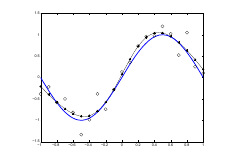

Figure.7 Bayesian Regularization Fit

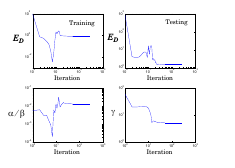

Figure.8 Bayesian Regularization Training Process

## Bayesian Regularization Algorithm

The Bayesian optimization of the regularization parameters requires the computation of the Hessian matrix of $ F(x) $ at the minimum point $ x_{MP} $. We propose using the Gauss-Newton approximation to the Hessian matrix, which is readily available if the Levenberg-Marquardt optimization algorithm is used to locate the minimum point. The steps required for Bayesian optimization of the regularization parameters, with the Gauss-Newton approximation to the Hessian matrix, are as follows:

0. **Initialization**: Initialize $ \alpha $, $ \beta $, and the weights. The weights are initialized randomly, and then $ E_D $ and $ E_W $ are computed. Set $ \gamma = n $ and compute $ \alpha $ and $ \beta $ using:

$$
\alpha = \frac{N - \gamma}{2E_W(x)} \quad \text{and} \quad \beta = \frac{N - \gamma}{2E_D(x)}
$$

1. **Levenberg-Marquardt Step**: Take one step of the Levenberg-Marquardt algorithm toward minimizing the objective function:

$$
F(x) = \beta E_D + \alpha E_W
$$

2. **Effective Number of Parameters**: Compute the effective number of parameters:

$$
\gamma = n - 2\alpha \text{tr}(H)
$$

where $ H $ is the Hessian approximation given by:

$$
H \approx 2\beta J^TJ + 2\alpha I_n
$$

Here, $ J $ is the Jacobian matrix of the training set errors.

3. **Update Regularization Parameters**: Compute new estimates for the regularization parameters:

$$
\alpha = \frac{N - \gamma}{2E_W(x)} \quad \text{and} \quad \beta = \frac{N - \gamma}{2E_D(x)}
$$

4. **Iteration**: Iterate steps 1 through 3 until convergence. Keep in mind that with each re-estimation of the regularization parameters $ \alpha $ and $ \beta $, the objective function $ F(x) $ changes; therefore, the minimum point is moving. If traversing the performance surface generally moves toward the next minimum point, then the new estimates for the regularization parameters will be more precise. Eventually, the precision will be good enough that the objective function will not significantly change in subsequent iterations, resulting in convergence.

When the Gauss-Newton approximation to Bayesian regularization (GNBR) algorithm is used, the best results are obtained if the training data is first mapped into the range $[-1, 1]$ (or some similar region).

### Training Results

The training process illustrates how the network has fit the underlying function without overfitting to the noise. The final regularization ratio was found to be:

$$
\frac{\alpha}{\beta} = 0.0137
$$

At the completion of training with GNBR, the effective number of parameters was:

$$
\gamma = 5.2
$$

This is out of a total of 61 weights and biases in the network. The effective number of parameters being much less than the total number indicates that we might have been able to use a smaller network to fit this data. 

### Disadvantages of a Large Network

1. **Overfitting**: A large network may overfit the data.
2. **Computation Time**: More computation is required to calculate the network output.

By training with GNBR, the network effectively behaves like a smaller network with only 6 parameters. This provides a balance between model complexity and performance.

### Conclusion

If the effective number of parameters is close to the total number of parameters, it may indicate that the network is not large enough to fit the data, suggesting that increasing the size of the network and retraining may be necessary.


In [ ]:
import numpy as np

class SimpleBayesianNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        """Forward pass."""
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        return self.z2

    @staticmethod
    def sigmoid(x):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-x))

    def compute_errors(self, X, y):
        """Compute prediction errors and regularization terms."""
        predictions = self.forward(X)
        errors = predictions - y
        E_D = np.mean(errors**2)  # Data error
        E_W = np.sum(self.W1**2) + np.sum(self.W2**2)  # Weight error
        return errors, E_D, E_W

    def jacobian(self, X, y):
        """Compute the Jacobian of the output errors."""
        m = X.shape[0]
        J = np.zeros((m, self.W1.size + self.W2.size + self.b1.size + self.b2.size))
        
        errors, _, _ = self.compute_errors(X, y)  # Get errors
        
        # Derivatives for W2
        J[:, self.W1.size + self.b1.size:self.W1.size + self.b1.size + self.W2.size] = (
            self.a1 * errors  # Broadcast correctly
        )
        
        # Derivatives for W1 and b1
        for i in range(m):
            delta = errors[i] * self.sigmoid(self.z2[i]) * (1 - self.sigmoid(self.z2[i]))  # Output layer error
            J[i, :self.W1.size] = delta * self.W2.T * self.sigmoid(self.z1[i]) * (1 - self.sigmoid(self.z1[i])) * X[i]

        return J

    def gauss_newton_hessian(self, X, y):
        """Approximate the Hessian using the Jacobian."""
        J = self.jacobian(X, y)
        return 2 * (J.T @ J) + 2 * np.eye(J.shape[1])

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        """Train the neural network with Bayesian regularization."""
        alpha, beta = 0.01, 0.01  # Regularization parameters
        
        for epoch in range(epochs):
            _, E_D, E_W = self.compute_errors(X, y)
            F_x = beta * E_D + alpha * E_W
            
            H = self.gauss_newton_hessian(X, y)
            gamma = X.shape[0] - 2 * alpha * np.trace(H)

            # Update regularization parameters
            alpha = (X.shape[0] - gamma) / (2 * E_W)
            beta = (X.shape[0] - gamma) / (2 * E_D)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, E_D: {E_D:.4f}, E_W: {E_W:.4f}, alpha: {alpha:.4f}, beta: {beta:.4f}')

# Usage example:
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    X_train = np.random.rand(100, 3)  # 100 samples, 3 features
    y_train = np.dot(X_train, np.array([1.5, -2.0, 1.0])) + 0.1 * np.random.randn(100, 1)  # Linear relation + noise

    # Create and train the Bayesian Regularization Neural Network
    model = SimpleBayesianNN(input_size=3, hidden_size=5, output_size=1)
    model.train(X_train, y_train)


## DO it ....Rectcify it

## Regularization Analysis

Recall from Eq. (13.4) that the regularized performance index adds a penalty term to the sum squared error, as in 

$$
F(x) = \beta E_D + \alpha E_W. \tag{13.33}
$$

For the following analysis, it will be more convenient to consider the following equivalent performance index (because the minimum occurs at the same place):

$$
F^*(x) = \frac{F(x)}{\beta} = E_D + \frac{\alpha}{\beta} E_W = E_D + \rho E_W, \tag{13.34}
$$

which has only one regularization parameter. The sum squared weight penalty term $E_W$ can be written as 

$$
E_W = (x - x_0)^T (x - x_0), \tag{13.35}
$$

where the nominal value $x_0$ is normally taken to be the zero vector. In order to locate the minimum of the regularized performance index, which is also the most probable value $x_{MP}$, we will set the gradient equal to zero:

$$
\nabla F^*(x) = \nabla E_D + \rho \nabla E_W = 0. \tag{13.36}
$$

The gradient of the penalty term, Eq. (13.35), is 

$$
\nabla E_W = 2(x - x_0). \tag{13.37}
$$

From Eq. (13.25) and Eq. (13.28), the gradient of the sum squared error is 

$$
\nabla E_D = -A^T y = A(x - \hat{x}) = A(x - x_{ML}). \tag{13.38}
$$

We can now set the total gradient to zero:

$$
\nabla F^*(x) = A(x - x_{ML}) + 2\rho(x - x_0) = 0. \tag{13.39}
$$

The solution of Eq. (13.39) is the most probable value for the weights, $x_{MP}$. We can make that substitution and perform some algebra to obtain

$$
A(x - x_{ML}) = -2\rho(x - x_0) = -2\rho(x - x_{ML} + x_{ML} - x_0) \tag{13.40}
$$

Now combine the terms multiplying $(x - x_{ML})$:

$$
(A + 2\rho I)(x - x_{ML}) = 2\rho(x_0 - x_{ML}). \tag{13.41}
$$

Solving for $(x - x_{ML})$, we find 

$$
(x - x_{ML}) = 2\rho(A + 2\rho I)^{-1}(x_0 - x_{ML}) = M_\rho (x_0 - x_{ML}), \tag{13.42}
$$

where $M_\rho = 2\rho(A + 2\rho I)^{-1}$. 

We want to know the relationship between the regularized solution $x_{MP}$ and the minimum of the squared error $x_{ML}$, so we can solve Eq. (13.42) for $x_{MP}$:

$$
x_{MP} = M_\rho x_0 + [I - M_\rho] x_{ML}. \tag{13.43}
$$

This is the key result that describes the relationship between the regularized solution and the minimum of the squared error. By comparing Eq. (13.43) with Eq. (13.32), we can investigate the relationship between early stopping and regularization. We will do that in the next section.


In [23]:
import numpy as np

class BayesianRegularizationNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

        # Regularization parameters
        self.alpha = 0.1
        self.beta = 0.1

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        return self.z2

    def loss(self, X, y):
        predictions = self.forward(X)
        E_D = np.mean((predictions - y) ** 2)  # Mean Squared Error
        E_W = np.sum(self.W1**2) + np.sum(self.W2**2)  # L2 Regularization
        return self.beta * E_D + self.alpha * E_W

    def jacobian(self, X, y):
        m = X.shape[0]
        J = np.zeros((m, self.W1.size + self.W2.size + self.b1.size + self.b2.size))
        
        # Calculate the gradients
        predictions = self.forward(X)
        errors = predictions - y
        
        # Derivative w.r.t W2 and b2
        J[:, self.W1.size + self.b1.size:] = (errors[:, None] * self.a1).T
        
        # Derivative w.r.t W1 and b1
        delta = (errors @ self.W2.T) * (self.a1 * (1 - self.a1))  # Backpropagation
        for i in range(m):
            J[i, :self.W1.size] = delta[i] * X[i]
        
        return J

    def gauss_newton_hessian(self, X, y):
        J = self.jacobian(X, y)
        # Gauss-Newton approximation to Hessian
        return 2 * (J.T @ J) + 2 * self.alpha * np.eye(self.W1.size + self.W2.size + self.b1.size + self.b2.size)

    def update_weights(self, X, y):
        # Placeholder for updating weights using the Levenberg-Marquardt algorithm
        pass  # Implement the optimization step here

    def fit(self, X, y, epochs=100):
        for epoch in range(epochs):
            self.update_weights(X, y)
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {self.loss(X, y)}')

# Example usage
input_size = 3
hidden_size = 5
output_size = 1
X = np.random.rand(100, input_size)  # 100 samples, input_size features
y = np.random.rand(100, output_size)  # 100 target values

nn = BayesianRegularizationNN(input_size, hidden_size, output_size)
nn.fit(X, y, epochs=100)


Epoch 0, Loss: 1.58937308684587
Epoch 10, Loss: 1.58937308684587
Epoch 20, Loss: 1.58937308684587
Epoch 30, Loss: 1.58937308684587
Epoch 40, Loss: 1.58937308684587
Epoch 50, Loss: 1.58937308684587
Epoch 60, Loss: 1.58937308684587
Epoch 70, Loss: 1.58937308684587
Epoch 80, Loss: 1.58937308684587
Epoch 90, Loss: 1.58937308684587
